# Importing the libraries

In [56]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.svm import LinearSVC
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

# Loading the Dataset

In [2]:
df=pd.read_excel("C:\\Users\\darsh\\Cleaned Data (1).xlsx")

In [3]:
df

,I am currently employed at least part-time,I identify as having a mental illness,Education,I have my own computer separate from a smart phone,I have been hospitalized before for my mental illness,How many days were you hospitalized for your mental illness,I am legally disabled,I have my regular access to the internet,I live with my parents,I have a gap in my resume,...,Obsessive thinking,Mood swings,Panic attacks,Compulsive behavior,Tiredness,Age,Gender,Household Income,Region,Device Type
0,0,0,High School or GED,0,0,0.0,0,1,0,1,...,1.0,0.0,1.0,0.0,0.0,30-44,Male,"$25,000-$49,999",Mountain,Android Phone / Tablet
1,1,1,Some Phd,1,0,0.0,0,1,0,0,...,0.0,0.0,1.0,0.0,1.0,18-29,Male,"$50,000-$74,999",East South Central,MacOS Desktop / Laptop
2,1,0,Completed Undergraduate,1,0,0.0,0,1,0,0,...,0.0,0.0,0.0,0.0,0.0,30-44,Male,"$150,000-$174,999",Pacific,MacOS Desktop / Laptop
3,0,0,Some Undergraduate,1,0,NaN,0,1,1,1,...,0.0,0.0,0.0,0.0,0.0,30-44,Male,"$25,000-$49,999",New England,Windows Desktop / Laptop
4,1,1,Completed Undergraduate,1,1,35.0,1,1,0,1,...,1.0,1.0,1.0,1.0,1.0,30-44,Male,"$25,000-$49,999",East North Central,iOS Phone / Tablet
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
329,0,0,High School or GED,1,0,NaN,1,1,0,0,...,0.0,0.0,0.0,0.0,1.0,45-60,Female,Prefer not to answer,Mountain,Android Phone / Tablet
330,1,0,Some Undergraduate,1,0,0.0,0,1,1,0,...,0.0,0.0,0.0,0.0,0.0,18-29,Male,"$50,000-$74,999",Pacific,Windows Desktop / Laptop
331,1,0,Some Undergraduate,1,0,0.0,0,1,0,0,...,0.0,0.0,0.0,0.0,0.0,> 60,Female,"$10,000-$24,999",West North Central,Windows Desktop / Laptop
332,0,1,Some Undergraduate,0,1,1.0,1,1,1,1,...,1.0,1.0,1.0,1.0,1.0,18-29,Female,"$0-$9,999",West South Central,Android Phone / Tablet


# Data processing

In [4]:
df.columns

Index(['I am currently employed at least part-time',
       'I identify as having a mental illness', 'Education',
       'I have my own computer separate from a smart phone',
       'I have been hospitalized before for my mental illness',
       'How many days were you hospitalized for your mental illness',
       'I am legally disabled', 'I have my regular access to the internet',
       'I live with my parents', 'I have a gap in my resume',
       'Total length of any gaps in my resume in months.',
       'Annual income (including any social welfare programs) in USD',
       'I am unemployed', 'I read outside of work and school',
       'Annual income from social welfare programs', 'I receive food stamps',
       'I am on section 8 housing',
       'How many times were you hospitalized for your mental illness',
       'Lack of concentration', 'Anxiety', 'Depression', 'Obsessive thinking',
       'Mood swings', 'Panic attacks', 'Compulsive behavior', 'Tiredness',
       'Age', 'Gender

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 334 entries, 0 to 333
Data columns (total 31 columns):
 #   Column                                                        Non-Null Count  Dtype  
---  ------                                                        --------------  -----  
 0   I am currently employed at least part-time                    334 non-null    int64  
 1   I identify as having a mental illness                         334 non-null    int64  
 2   Education                                                     334 non-null    object 
 3   I have my own computer separate from a smart phone            334 non-null    int64  
 4   I have been hospitalized before for my mental illness         334 non-null    int64  
 5   How many days were you hospitalized for your mental illness   297 non-null    float64
 6   I am legally disabled                                         334 non-null    int64  
 7   I have my regular access to the internet                      334 non-n

In [6]:
df.describe()

,I am currently employed at least part-time,I identify as having a mental illness,I have my own computer separate from a smart phone,I have been hospitalized before for my mental illness,How many days were you hospitalized for your mental illness,I am legally disabled,I have my regular access to the internet,I live with my parents,I have a gap in my resume,Total length of any gaps in my resume in months.,...,I am on section 8 housing,How many times were you hospitalized for your mental illness,Lack of concentration,Anxiety,Depression,Obsessive thinking,Mood swings,Panic attacks,Compulsive behavior,Tiredness
count,334.000000,334.000000,334.000000,334.000000,297.000000,334.000000,334.000000,334.000000,334.000000,334.000000,...,334.000000,334.000000,333.000000,334.000000,334.000000,333.000000,333.000000,333.000000,333.000000,333.000000
mean,0.679641,0.239521,0.874251,0.077844,3.276094,0.098802,0.964072,0.110778,0.245509,8.497006,...,0.020958,1.194611,0.153153,0.299401,0.257485,0.126126,0.114114,0.147147,0.087087,0.300300
std,0.467315,0.427431,0.332063,0.268328,14.126045,0.298844,0.186390,0.314328,0.431034,20.722643,...,0.143459,8.115227,0.360677,0.458683,0.437905,0.332491,0.318428,0.354786,0.282387,0.459078
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,4.750000,...,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,100.000000,1.000000,1.000000,1.000000,1.000000,100.000000,...,1.000000,100.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [7]:
df.rename(columns={'I identify as having a mental illness':'MentallyIll'}, inplace =True)
df.rename(columns={'I am unemployed':'Unemployed'}, inplace =True)

In [8]:
df.rename(columns={'Annual income (including any social welfare programs) in USD':'Income'}, inplace =True)


#converting string to int or float
income = pd.to_numeric(df.Income)

In [9]:
#Null value analysis
df.isnull().sum()

I am currently employed at least part-time                       0
MentallyIll                                                      0
Education                                                        0
I have my own computer separate from a smart phone               0
I have been hospitalized before for my mental illness            0
How many days were you hospitalized for your mental illness     37
I am legally disabled                                            0
I have my regular access to the internet                         0
I live with my parents                                           0
I have a gap in my resume                                        0
Total length of any gaps in my resume in months.                 0
Income                                                           0
Unemployed                                                       0
I read outside of work and school                                0
Annual income from social welfare programs                    

In [10]:
df.drop('How many days were you hospitalized for your mental illness', axis=1,inplace=True)

df.drop("Device Type",axis=1,inplace=True)

In [11]:
df.MentallyIll

0      0
1      1
2      0
3      0
4      1
      ..
329    0
330    0
331    0
332    1
333    1
Name: MentallyIll, Length: 334, dtype: int64

In [12]:
df.MentallyIll.describe()

count    334.000000
mean       0.239521
std        0.427431
min        0.000000
25%        0.000000
50%        0.000000
75%        0.000000
max        1.000000
Name: MentallyIll, dtype: float64

In [13]:
df.MentallyIll.nunique()

2

In [14]:
df.MentallyIll.unique()

array([0, 1], dtype=int64)

<AxesSubplot:>

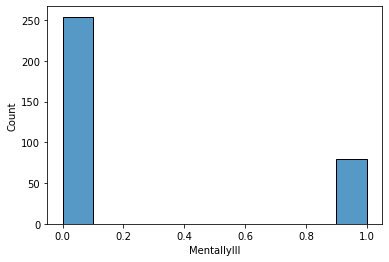

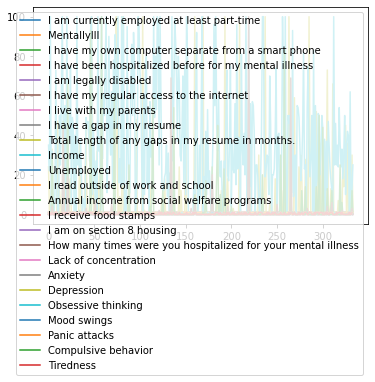

In [15]:
sns.histplot(df["MentallyIll"])
df.plot()

# Visualization

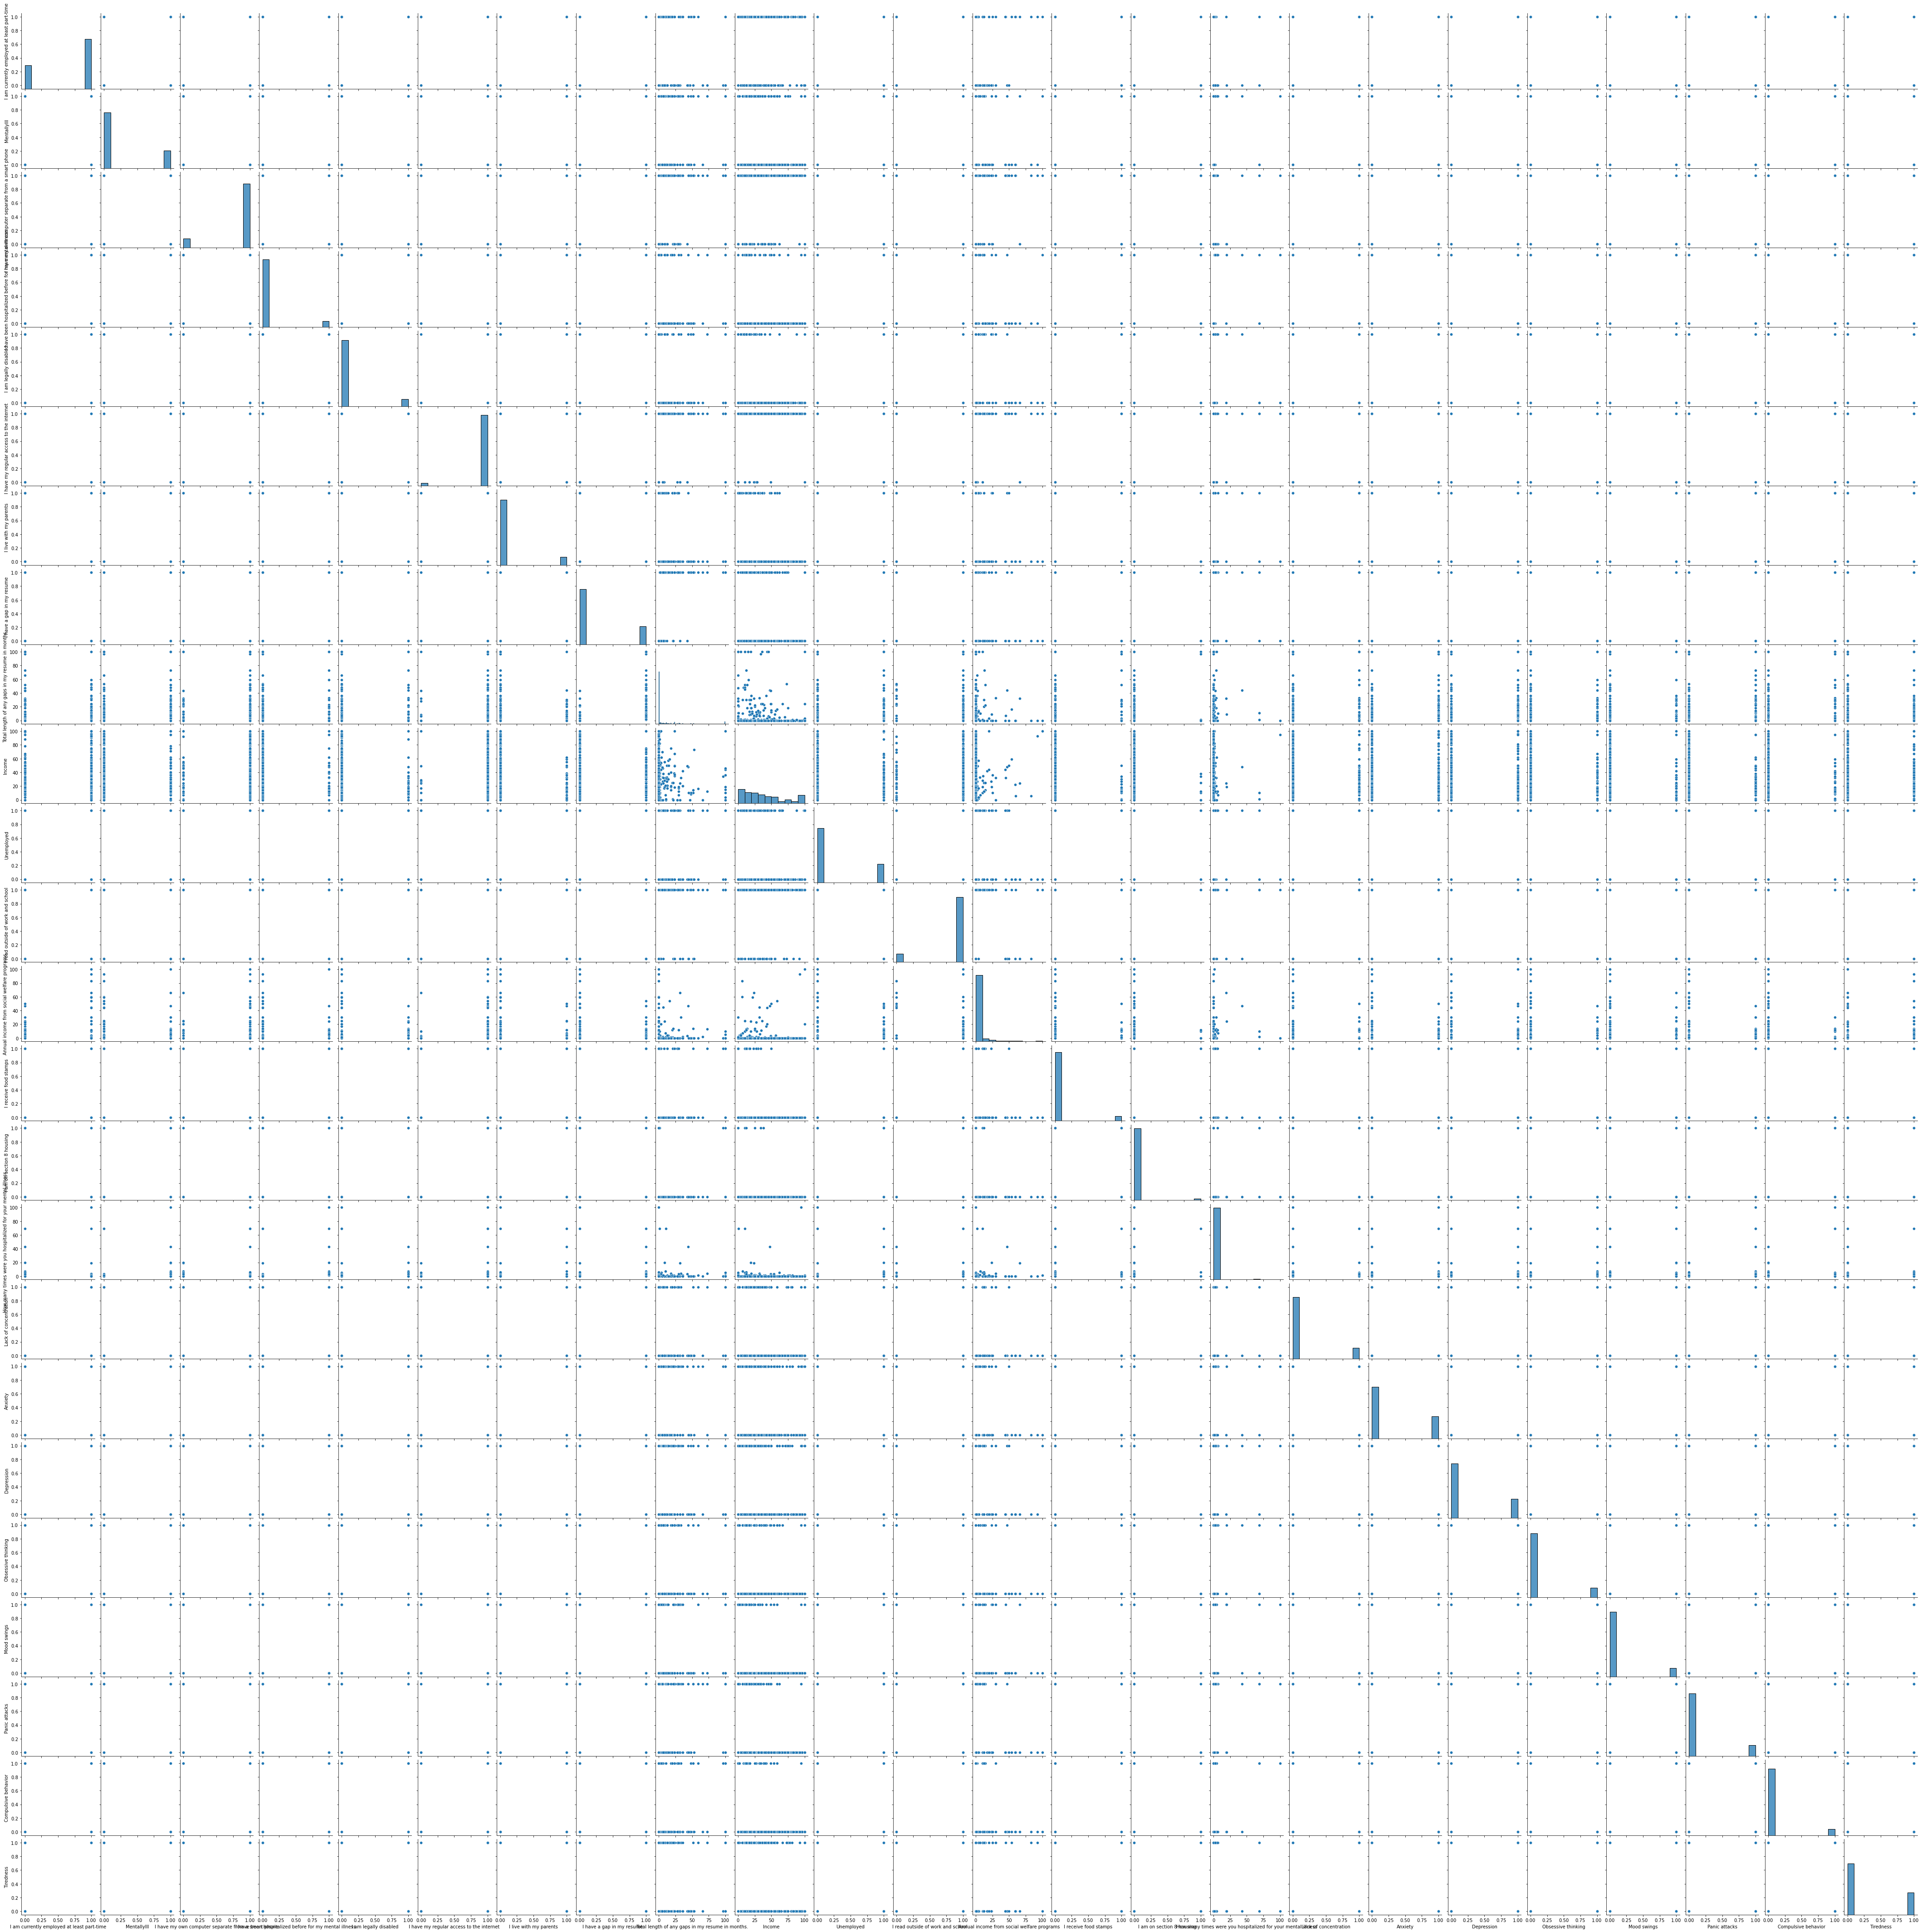

In [16]:
sns.pairplot(df)

In [17]:
#columns with object type values
df.select_dtypes('object').columns

Index(['Education', 'Age', 'Gender', 'Household Income', 'Region'], dtype='object')

In [18]:
{column: len(df[column].unique()) for column in df.select_dtypes('object').columns}

{'Education': 8, 'Age': 4, 'Gender': 2, 'Household Income': 11, 'Region': 10}

In [19]:
{column: list(df[column].unique()) for column in df.select_dtypes('object').columns}

{'Education': ['High School or GED',
  'Some Phd',
  'Completed Undergraduate',
  'Some Undergraduate',
  'Some\xa0Masters',
  'Completed Masters',
  'Completed Phd',
  'Some highschool'],
 'Age': ['30-44', '18-29', '45-60', '> 60'],
 'Gender': ['Male', 'Female'],
 'Household Income': ['$25,000-$49,999',
  '$50,000-$74,999',
  '$150,000-$174,999',
  '$0-$9,999',
  '$100,000-$124,999',
  '$125,000-$149,999',
  'Prefer not to answer',
  '$10,000-$24,999',
  '$75,000-$99,999',
  '$200,000+',
  '$175,000-$199,999'],
 'Region': ['Mountain',
  'East South Central',
  'Pacific',
  'New England',
  'East North Central',
  'South Atlantic',
  'Middle Atlantic',
  'West South Central',
  'West North Central',
  nan]}

In [20]:
#create function for gender encoding 

def encode_gender(x):
    if x.lower()[0] == 'F':   #if first letter of gender ie 0 is equal to f 
        return 0
    elif x.lower()[0] == 'M':
        return 1
    else:
        return 2

In [21]:
#apply the above function
df['Gender'] = df['Gender'].apply(encode_gender)

In [22]:
ordinal_features = [
    'Age',
    'Household Income'
]

nominal_features = [
    'Education',
    'Region',
   
]

In [23]:
def ordinal_encode(data, columns, orderings):
    data = data.copy()
    for column, ordering in zip(columns, orderings):
        df[column] = df[column].apply(lambda x: ordering.index(x))
    return df

def onehot_encode(data, columns, prefixes):
    data = data.copy()
    for column, prefix in zip(columns, prefixes):
        dummies = pd.get_dummies(df[column], prefix)
        data = pd.concat([data, dummies], axis=1)
        data = data.drop(column, axis=1)
    return data

In [24]:
ordinal_orderings = [
    ['30-44', '18-29', '45-60', '> 60'],
    ['$25,000-$49,999',
  '$50,000-$74,999',
  '$150,000-$174,999',
  '$0-$9,999',
  '$100,000-$124,999',
  '$125,000-$149,999',
  'Prefer not to answer',
  '$10,000-$24,999',
  '$75,000-$99,999',
  '$200,000+',
  '$175,000-$199,999']
]

nominal_prefixes = [
    'Ed',
    'Re',
    
]

In [25]:
df = ordinal_encode(
    df,
    columns=ordinal_features,
    orderings=ordinal_orderings
)

df = onehot_encode(
    df,
    columns=nominal_features,
    prefixes=nominal_prefixes
)

In [26]:
df

,I am currently employed at least part-time,MentallyIll,I have my own computer separate from a smart phone,I have been hospitalized before for my mental illness,I am legally disabled,I have my regular access to the internet,I live with my parents,I have a gap in my resume,Total length of any gaps in my resume in months.,Income,...,Ed_Some Masters,Re_East North Central,Re_East South Central,Re_Middle Atlantic,Re_Mountain,Re_New England,Re_Pacific,Re_South Atlantic,Re_West North Central,Re_West South Central
0,0,0,0,0,0,1,0,1,24,35,...,0,0,0,0,1,0,0,0,0,0
1,1,1,1,0,0,1,0,0,1,22,...,0,0,1,0,0,0,0,0,0,0
2,1,0,1,0,0,1,0,0,0,100,...,0,0,0,0,0,0,1,0,0,0
3,0,0,1,0,0,1,1,1,11,0,...,0,0,0,0,0,1,0,0,0,0
4,1,1,1,1,1,1,0,1,33,32,...,0,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
329,0,0,1,0,1,1,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
330,1,0,1,0,0,1,1,0,0,62,...,0,0,0,0,0,0,1,0,0,0
331,1,0,1,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
332,0,1,0,1,1,1,1,1,30,12,...,0,0,0,0,0,0,0,0,0,1


In [27]:
# This removes the rows that contain infinity or Nan values
df_new = df[np.isfinite(df).all(1)]
df_new

,I am currently employed at least part-time,MentallyIll,I have my own computer separate from a smart phone,I have been hospitalized before for my mental illness,I am legally disabled,I have my regular access to the internet,I live with my parents,I have a gap in my resume,Total length of any gaps in my resume in months.,Income,...,Ed_Some Masters,Re_East North Central,Re_East South Central,Re_Middle Atlantic,Re_Mountain,Re_New England,Re_Pacific,Re_South Atlantic,Re_West North Central,Re_West South Central
0,0,0,0,0,0,1,0,1,24,35,...,0,0,0,0,1,0,0,0,0,0
1,1,1,1,0,0,1,0,0,1,22,...,0,0,1,0,0,0,0,0,0,0
2,1,0,1,0,0,1,0,0,0,100,...,0,0,0,0,0,0,1,0,0,0
3,0,0,1,0,0,1,1,1,11,0,...,0,0,0,0,0,1,0,0,0,0
4,1,1,1,1,1,1,0,1,33,32,...,0,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
328,0,1,0,0,0,1,0,0,0,40,...,0,0,0,0,1,0,0,0,0,0
329,0,0,1,0,1,1,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
330,1,0,1,0,0,1,1,0,0,62,...,0,0,0,0,0,0,1,0,0,0
331,1,0,1,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


# Feature Selection

In [28]:
corr=df.corr()

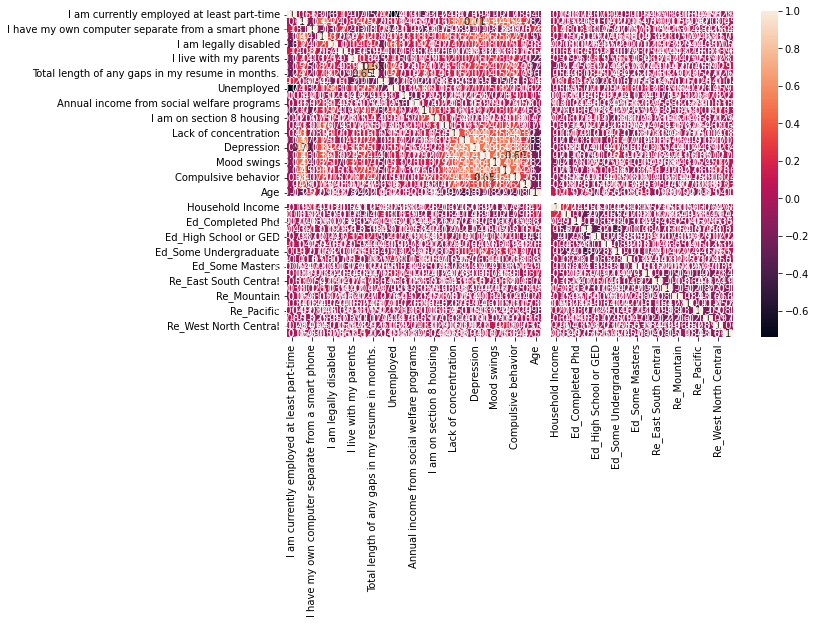

In [29]:
plt.figure(figsize=(10,6))
sns.heatmap(corr, annot=True)
plt.savefig('Correlation_Matrix.jpg')


# Train test spliting

In [30]:
X = df_new.drop('MentallyIll', axis = 1)
Y = df_new['MentallyIll']

In [31]:
X.shape

(333, 43)

In [32]:
Y.shape

(333,)

In [33]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2 ,random_state = 10 )
Y_train.value_counts()

0    195
1     71
Name: MentallyIll, dtype: int64

# Implementing the Random forest classifier for feature selection

In [34]:
sel = SelectFromModel(RandomForestClassifier(n_estimators = 100))
sel.fit(X_train, Y_train)

SelectFromModel(estimator=RandomForestClassifier())

In [35]:
selected_feat= X_train.columns[(sel.get_support())]
len(selected_feat)

12

In [36]:
print(selected_feat)

Index(['I have been hospitalized before for my mental illness',
       'Total length of any gaps in my resume in months.', 'Income',
       'How many times were you hospitalized for your mental illness',
       'Lack of concentration', 'Anxiety', 'Depression', 'Obsessive thinking',
       'Mood swings', 'Panic attacks', 'Age', 'Household Income'],
      dtype='object')


# Applying different models to see which yields the best accuracy

# Support Vector Machine

# Linear Kernel

In [37]:
svm_classifier_linear = SVC(kernel='linear', C=5)
svm_classifier_linear.fit(X_train, Y_train)

SVC(C=5, kernel='linear')

# RBF Kernel

In [38]:
svm_classifier_rbf = SVC(kernel='rbf', C=5)
svm_classifier_rbf.fit(X_train,Y_train)

SVC(C=5)

# Polynomial Kernel

In [39]:
svm_classifier_poly = SVC(kernel = 'poly', degree=2)
svm_classifier_poly.fit(X_train, Y_train)

SVC(degree=2, kernel='poly')

In [40]:
Y_pred_svm_linear = svm_classifier_linear.predict(X_test)
Y_pred_svm_rbf = svm_classifier_rbf.predict(X_test)
Y_pred_svm_poly = svm_classifier_poly.predict(X_test)

Classification Report for SVM linear model
              precision    recall  f1-score   support

           0       0.96      0.90      0.93        59
           1       0.50      0.75      0.60         8

    accuracy                           0.88        67
   macro avg       0.73      0.82      0.76        67
weighted avg       0.91      0.88      0.89        67



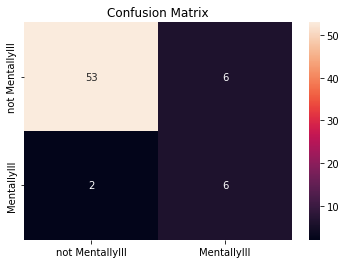

In [41]:
conf_mat = confusion_matrix(Y_test, Y_pred_svm_linear)
df_cm = pd.DataFrame(conf_mat, index = [i for i in ['not MentallyIll', 'MentallyIll']],
                  columns = [i for i in ['not MentallyIll', 'MentallyIll']])
sns.heatmap(df_cm, annot=True, fmt='g')
plt.title('Confusion Matrix')
plt.plot()

print("Classification Report for SVM linear model")
print(classification_report(Y_test, Y_pred_svm_linear))

Classification Report for SVM RBF model
              precision    recall  f1-score   support

           0       0.89      0.97      0.93        59
           1       0.33      0.12      0.18         8

    accuracy                           0.87        67
   macro avg       0.61      0.55      0.55        67
weighted avg       0.82      0.87      0.84        67



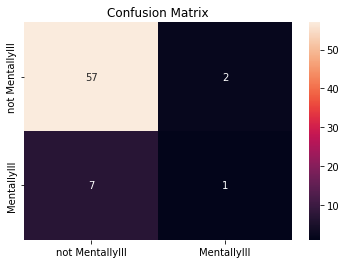

In [42]:
conf_mat = confusion_matrix(Y_test, Y_pred_svm_rbf)
df_cm = pd.DataFrame(conf_mat, index = [i for i in ['not MentallyIll', 'MentallyIll']],
                  columns = [i for i in ['not MentallyIll', 'MentallyIll']])
sns.heatmap(df_cm, annot=True, fmt='g')
plt.title('Confusion Matrix')
plt.plot()

print("Classification Report for SVM RBF model")
print(classification_report(Y_test, Y_pred_svm_rbf))

Classification Report for SVM Polynomial model
              precision    recall  f1-score   support

           0       0.88      1.00      0.94        59
           1       0.00      0.00      0.00         8

    accuracy                           0.88        67
   macro avg       0.44      0.50      0.47        67
weighted avg       0.78      0.88      0.82        67



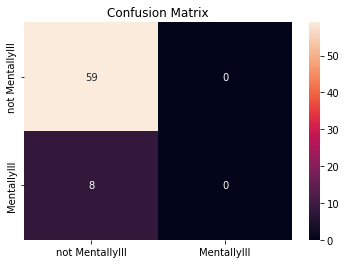

In [43]:
conf_mat = confusion_matrix(Y_test, Y_pred_svm_poly)
df_cm = pd.DataFrame(conf_mat, index = [i for i in ['not MentallyIll', 'MentallyIll']],
                  columns = [i for i in ['not MentallyIll', 'MentallyIll']])
sns.heatmap(df_cm, annot=True, fmt='g')
plt.title('Confusion Matrix')
plt.plot()

print("Classification Report for SVM Polynomial model")
print(classification_report(Y_test, Y_pred_svm_poly))

# Logistic Regression

In [44]:
#Fitting Logistic Regression to the training set  
from sklearn.linear_model import LogisticRegression  
classifier= LogisticRegression(random_state=0)  
classifier.fit(X_train, Y_train)  

LogisticRegression(random_state=0)

In [45]:
#Predicting the test set result  
y_pred= classifier.predict(X_test)  

Classification Report for Logistic Regression model
              precision    recall  f1-score   support

           0       0.97      0.98      0.97        59
           1       0.86      0.75      0.80         8

    accuracy                           0.96        67
   macro avg       0.91      0.87      0.89        67
weighted avg       0.95      0.96      0.95        67



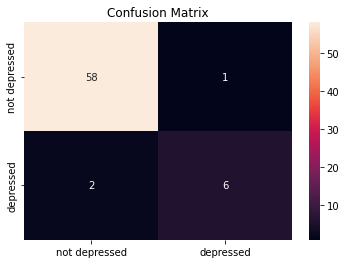

In [46]:
conf_mat = confusion_matrix(Y_test, y_pred)
df_cm = pd.DataFrame(conf_mat, index = [i for i in ['not depressed', 'depressed']],
                  columns = [i for i in ['not depressed', 'depressed']])
sns.heatmap(df_cm, annot=True, fmt='g')
plt.title('Confusion Matrix')
plt.plot()

print("Classification Report for Logistic Regression model")
print(classification_report(Y_test, y_pred))

# Decision tree

In [53]:
model = DecisionTreeClassifier()
model.fit(X_train, Y_train)
Y_pred = model.predict(X_test)
print(accuracy_score(Y_test, Y_pred)*100)
#Y_pred = model.predict(X_test)

88.05970149253731


In [54]:
print(accuracy_score(Y_test, Y_pred)*100)

88.05970149253731


Classification Report forDecision Tree 3 model
              precision    recall  f1-score   support

           0       1.00      0.86      0.93        59
           1       0.50      1.00      0.67         8

    accuracy                           0.88        67
   macro avg       0.75      0.93      0.80        67
weighted avg       0.94      0.88      0.90        67



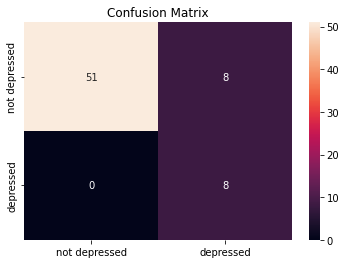

In [55]:
conf_mat = confusion_matrix(Y_test, Y_pred)
df_cm = pd.DataFrame(conf_mat, index = [i for i in ['not depressed', 'depressed']],
                  columns = [i for i in ['not depressed', 'depressed']])
sns.heatmap(df_cm, annot=True, fmt='g')
plt.title('Confusion Matrix')
plt.plot()

print("Classification Report forDecision Tree 3 model")
print(classification_report(Y_test, Y_pred))